# Imports

In [27]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# To import from this project
import sys
sys.path.insert(0, '..')

# HDPGMM

In [ ]:
from models.dpgmm import DPGMM

## Sample generation
Generate samples from a DPGMM with random parameters.

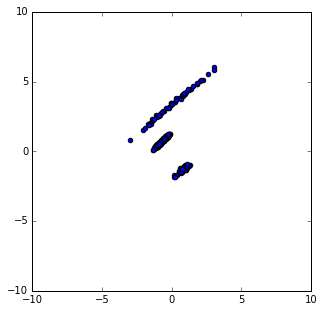

pi: [[ 0.09392322]
 [ 0.10839554]
 [ 0.79768124]]

mu: [[ 0.81390622 -1.30424917]
 [ 0.04861925  3.42821529]
 [-0.6714601   0.75682832]]

cov: [[[ 0.09111677  0.06150049]
  [ 0.06150049  0.05657999]]

 [[ 1.66687538  1.42186311]
  [ 1.42186311  1.21923765]]

 [[ 0.05592352  0.05249207]
  [ 0.05249207  0.05135281]]]

assigment counts 0: 45
assigment counts 1: 54
assigment counts 2: 401


In [33]:
# Settings
N = 500
d = 2
K = 3

# Feed
X = multivariate_normal.rvs(mean=[0., 0.], cov=np.eye(d), size = N)

# Create a random DPGMM and sample from it
dpgmm = DPGMM()
dpgmm.set_random_parameters(X, K)
X = dpgmm.sample(N, sort=True)

# Plot samples
fig = plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1])
plt.axis([-10, 10, -10, 10])
plt.show()

print("pi: " + str(dpgmm.pi))
print("")
print("mu: " + str(dpgmm.mu))
print("")
print("cov: " + str(dpgmm.cov))
print("")
for i in range(dpgmm.K_active):
    print("assigment counts " + str(i) + ": " + str(np.count_nonzero(dpgmm.z == i)))

In [34]:
cm_true = np.zeros((N, N))
cm_true = dpgmm.update_confusion_matrix(cm_true)

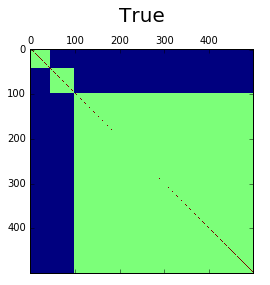

In [35]:
plt.matshow(cm_true)
plt.title('True', size=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.10])
plt.show()

## Clustering
Fit a DPGMM to the generated data and evaluate the obtained clustering with a confusion matrix.

In [36]:
cm = dpgmm.fit(X, n_iterations=150, n_burnin=100, return_cm=True)

100%|██████████| 150/150 [01:37<00:00,  1.53it/s]


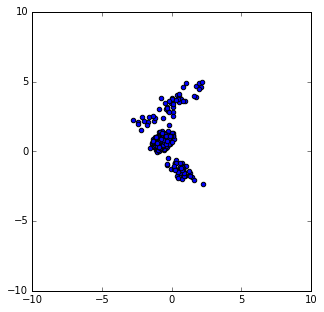

K_active: 3
pi: [[ 0.7820499 ]
 [ 0.10668872]
 [ 0.11126137]]

mu: [[-0.68701528  0.7325503 ]
 [ 0.72016066 -1.29629563]
 [ 0.20713102  3.53014321]]

cov: [[[ 0.09135517  0.02940468]
  [ 0.02940468  0.07219301]]

 [[ 0.28493393 -0.13047143]
  [-0.13047143  0.14362952]]

 [[ 1.48749836  0.89971813]
  [ 0.89971813  0.80786509]]]

assigment counts 0: 400
assigment counts 1: 51
assigment counts 2: 49


In [38]:
# Sample from the fitted DPGMM
X = dpgmm.sample(N)
    
# Plot samples to compare with the original data
fig = plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1])
plt.axis([-10, 10, -10, 10])
plt.show()

print("K_active: " + str(dpgmm.K_active))
print("pi: " + str(dpgmm.pi))
print("")
print("mu: " + str(dpgmm.mu))
print("")
print("cov: " + str(dpgmm.cov))
print("")
for i in range(dpgmm.K_active):
    print("assigment counts " + str(i) + ": " + str(np.count_nonzero(dpgmm.z == i)))

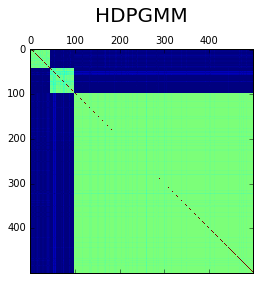

In [39]:
plt.matshow(cm)
plt.title('HDPGMM', size=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.10])
plt.show()

# BISCUIT

In [41]:
from models.biscuit import Biscuit

# Sample generation
Generate samples from a BISCUIT with random parameters.

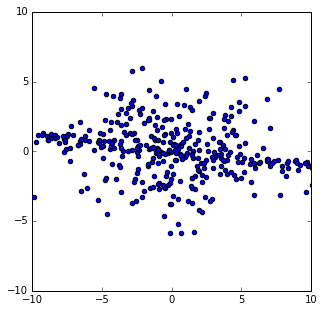

pi: [[ 0.7820499 ]
 [ 0.10668872]
 [ 0.11126137]]

mu: [[-0.68701528  0.7325503 ]
 [ 0.72016066 -1.29629563]
 [ 0.20713102  3.53014321]]

cov: [[[ 0.09135517  0.02940468]
  [ 0.02940468  0.07219301]]

 [[ 0.28493393 -0.13047143]
  [-0.13047143  0.14362952]]

 [[ 1.48749836  0.89971813]
  [ 0.89971813  0.80786509]]]

assigment counts 0: 400
assigment counts 1: 51
assigment counts 2: 49


In [50]:
# Settings
N = 500
d = 2
K = 3

# Feed
X = multivariate_normal.rvs(mean=[0., 0.], cov=np.eye(d), size = N)

# Create a random Biscuit and sample from it
biscuit = Biscuit()
biscuit.set_random_parameters(X, K)
X = biscuit.sample(N, sort=True)

# Plot samples
fig = plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1])
plt.axis([-10, 10, -10, 10])
plt.show()

print("pi: " + str(dpgmm.pi))
print("")
print("mu: " + str(dpgmm.mu))
print("")
print("cov: " + str(dpgmm.cov))
print("")
for i in range(dpgmm.K_active):
    print("assigment counts " + str(i) + ": " + str(np.count_nonzero(dpgmm.z == i)))

## Clustering
Fit a Biscuit to the generated data and evaluate the obtained clustering with a confusion matrix.

In [51]:
cm = biscuit.fit(X, n_iterations=150, n_burnin=100, return_cm=True)

100%|██████████| 150/150 [02:46<00:00,  1.11s/it]


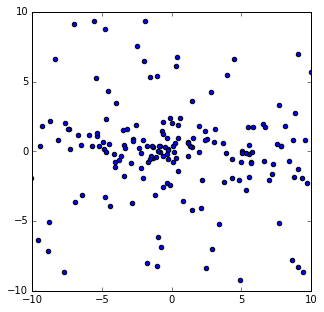

K_active: 8
pi: [[ 0.07328676]
 [ 0.30137962]
 [ 0.16174596]
 [ 0.08526658]
 [ 0.20181794]
 [ 0.17234804]
 [ 0.0041551 ]
 [ 0.        ]]

mu: [[ -5.18508457   0.59783251]
 [  0.026753    -0.01261483]
 [  0.90876021  -1.4435449 ]
 [ -0.08320049   0.11479967]
 [ -0.49208979   2.32568885]
 [  1.0637241   -0.11369484]
 [ 11.06498852  -1.33887762]
 [  0.           0.        ]]

cov: [[[  5.97508502e+04  -8.27615405e+03]
  [ -8.27615405e+03   3.39766336e+03]]

 [[  3.73612242e+02  -4.27870491e+01]
  [ -4.27870491e+01   5.17353507e+00]]

 [[  4.88978023e+01   6.05153246e+00]
  [  6.05153246e+00   1.57853783e+01]]

 [[  1.78089542e+00   3.03403880e-01]
  [  3.03403880e-01   8.57284594e-01]]

 [[  6.91635631e+01  -3.11452922e+00]
  [ -3.11452922e+00   1.10357677e+01]]

 [[  4.67176568e+03  -5.49620605e+02]
  [ -5.49620605e+02   6.58216115e+01]]

 [[  9.82500062e+02  -1.60007277e+02]
  [ -1.60007277e+02   3.91047233e+01]]

 [[  0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+0

In [52]:
# Sample from the fitted Biscuit
X = biscuit.sample(N)
    
# Plot samples to compare with the original data
fig = plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1])
plt.axis([-10, 10, -10, 10])
plt.show()

print("K_active: " + str(biscuit.K_active))
print("pi: " + str(biscuit.pi))
print("")
print("mu: " + str(biscuit.mu))
print("")
print("cov: " + str(biscuit.cov))
print("")
for i in range(biscuit.K_active):
    print("assigment counts " + str(i) + ": " + str(np.count_nonzero(biscuit.z == i)))

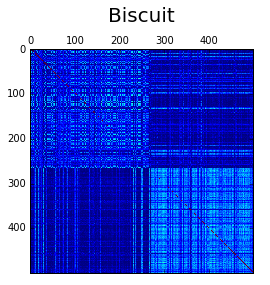

In [53]:
plt.matshow(cm)
plt.title('Biscuit', size=20)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.10])
plt.show()